# India's COVID-19 Exploratory analysis
---

![](https://e3.365dm.com/21/03/1600x900/skynews-india-vaccine-graphic_5325213.jpg?bypass-service-worker&20210331165132)

#### **About**

This document contains basic exploaratory data analysis of COVID-19 Disease in India. This notebook serves to analyze and visualize the progress of the pandemic from various perspectives.

#### **Introduction**

The first signs of **COVID-19 in India** was reported in some towns of Kerala, among three Indian medical students who had returned from Wuhan. After that, the Government of India had announced lockdown on **25 March 2020**. India faced its **first wave** from May 2020 to January 2020 with an Amplitude of around **90,000** new infections a day. As of now India is going under second wave which has proved to be more deadlier than previous one.

## 1. Cases, Deaths and Recovery

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
ind_covid_df = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [3]:
ind_covid_df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
499,12 June 2021,2021-06-12,80525,29438859,132664,28035743,3300,369816
500,13 June 2021,2021-06-13,71001,29509860,119574,28155317,3922,373738
501,14 June 2021,2021-06-14,60008,29569868,117376,28272693,2733,376471
502,15 June 2021,2021-06-15,62214,29632082,107767,28380460,2540,379011


In [4]:
ind_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             504 non-null    object
 1   Date_YMD         504 non-null    object
 2   Daily Confirmed  504 non-null    int64 
 3   Total Confirmed  504 non-null    int64 
 4   Daily Recovered  504 non-null    int64 
 5   Total Recovered  504 non-null    int64 
 6   Daily Deceased   504 non-null    int64 
 7   Total Deceased   504 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 31.6+ KB


In [5]:
ind_covid_df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [6]:
ind_covid_df['Date_YMD'] = pd.to_datetime(ind_covid_df['Date_YMD'])

In [7]:
ind_covid_df.tail(1)

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
503,16 June 2021,2021-06-16,67289,29699371,103900,28484360,2329,381340


In [8]:
total_cases = ind_covid_df['Total Confirmed']
dates = ind_covid_df['Date_YMD']

In [9]:
curr_date = dates.max()
curr_total_cases = int(total_cases.tail(1))

In [10]:
dates.max()

Timestamp('2021-06-16 00:00:00')

In [11]:
filt = ind_covid_df.Date_YMD==dates.max()
today_cases = int(ind_covid_df.loc[filt, 'Daily Confirmed'])

today_deaths = int(ind_covid_df.loc[filt, 'Daily Deceased'])

today_recovered = int(ind_covid_df.loc[filt, 'Daily Recovered'])

curr_total_deaths = int(ind_covid_df.loc[filt, 'Total Deceased'])

curr_total_recovered = int(ind_covid_df.loc[filt, 'Total Recovered'])

Text(-80, 1, '29699371')

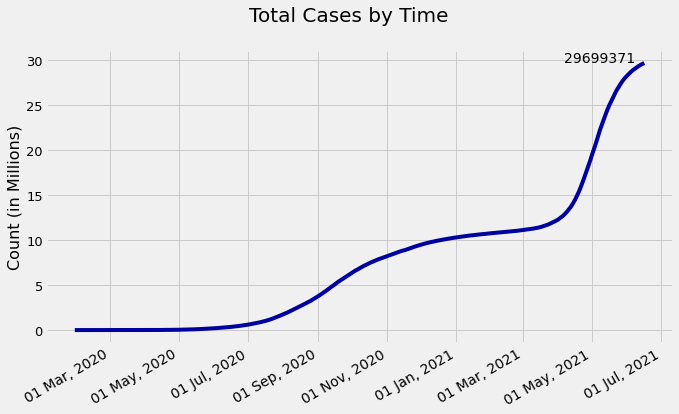

In [12]:
plt.style.use('fivethirtyeight')
# total_cases.plot(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(dates, total_cases.values/10**6, color='#0000a0')
# plt.plot(total_deaths.index, total_deaths.values, linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('')
plt.ylabel('Count (in Millions)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.suptitle('Total Cases by Time', fontsize=20)

plt.annotate(text=str(curr_total_cases), xy=(curr_date,curr_total_cases/10**6),
             xycoords='data', xytext=(-80,1), textcoords='offset points', fontsize=14)

The logarithmic rise of total cases was observed from July end 2020 till December 2020 which seemed to saturate in january 2020. But April 2020 onwards, cases started to increase at much higher rate than before

In [13]:
daily_cases = ind_covid_df['Daily Confirmed']

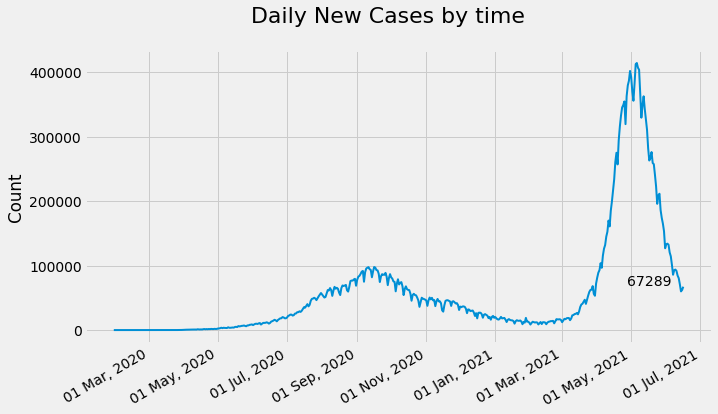

In [14]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_cases,'-', linewidth=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Cases by time',fontsize=22)

plt.annotate(text=str(today_cases), xy=(curr_date, today_cases),
             xycoords='data', xytext=(-56,1), textcoords='offset points', fontsize=14)

plt.savefig('Images/daily_cases.png')

From July 2020 Onwards infection rate started to increase and reached its first peak at September 2020 with over 90,000 cases reported per-day.\
Cases began to decline from October 2020 and were reported below 15,000 in January 2021 which was a good sign.

A second wave beginning in March 2021 was much larger than first, with shortages of vaccines, hospital beds, oxygen cylinders and other medicines such as remdesivir in parts of the country. By April end daily infection count reached over 400,000 which was new record

In [15]:
total_deaths = ind_covid_df['Total Deceased']

Text(-56, 1, '381340')

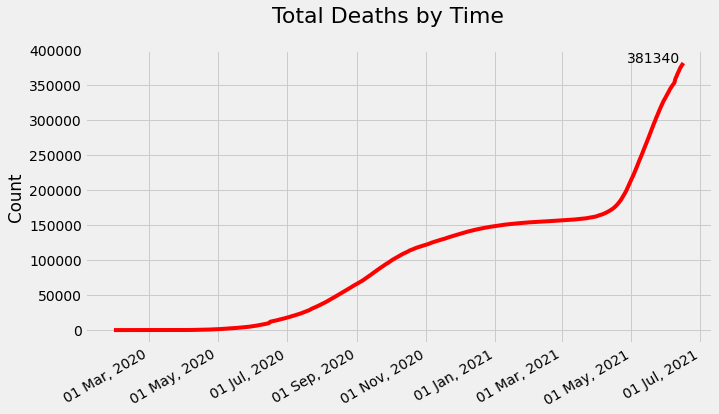

In [16]:
plt.figure(figsize=(10,6))
plt.plot(dates, total_deaths, color='red')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Total Deaths by Time', fontsize=22)

plt.annotate(text=str(curr_total_deaths), xy=(curr_date, curr_total_deaths),
             xycoords='data', xytext=(-56,1), textcoords='offset points', fontsize=14)

In [17]:
daily_deaths = ind_covid_df['Daily Deceased']

Text(-40, 1, '2329')

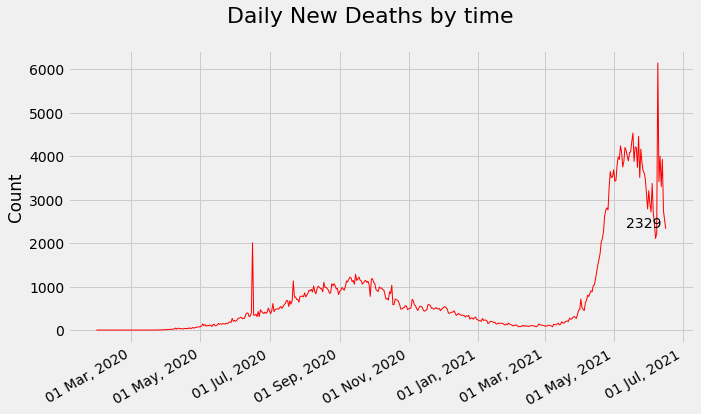

In [18]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_deaths,'-r', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Deaths by time',fontsize=22)

plt.annotate(text=str(today_deaths), xy=(curr_date, today_deaths),
             xycoords='data', xytext=(-40,1), textcoords='offset points', fontsize=14)

Above plot depicts that their were large no. of deaths in August, September and October months of year 2020.
Sudden spike of deaths was seen in mid-June month. 
In Second wave the deaths are 4 to 5 times more than the previous wave

### Let us see if their is any correlation between new cases and new deaths on daily basis

Text(0, 0.5, 'New Deaths')

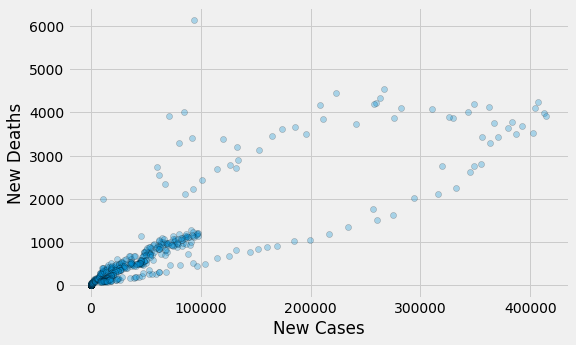

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(daily_cases, daily_deaths, edgecolor='black', alpha=.3)
plt.xlabel('New Cases')
plt.ylabel('New Deaths')

The Scatterplot shows that Daily New deaths are linearly correlated with new cases on daily basis.
Their is positive, strong relation between the two, as more points overlapp to form a line 

i.e. Deaths occuring each day depends on the fresh Covid cases on that day. More the no. of cases are found more deaths will occur.

From above plots we can conclude, that if we could stop or supress the fresh Covid cases, then their would be less deaths.

`if we could prevent new cases from happening, deaths would reduce`

In [20]:
total_recovered = ind_covid_df['Total Recovered']

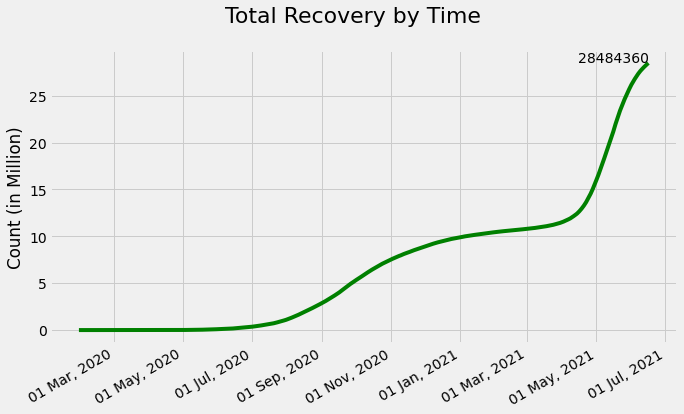

In [21]:
plt.figure(figsize=(10,6))
plt.plot(dates, total_recovered/10**6, color='green')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count (in Million)')
plt.suptitle('Total Recovery by Time', fontsize=22)

plt.annotate(text=str(curr_total_recovered), xy=(curr_date, curr_total_recovered/10**6),
             xycoords='data', xytext=(-70,1), textcoords='offset points', fontsize=14)

plt.savefig('Images/tot_recov.png')

In [22]:
daily_recovered = ind_covid_df['Daily Recovered']

Text(-60, 1, '103900')

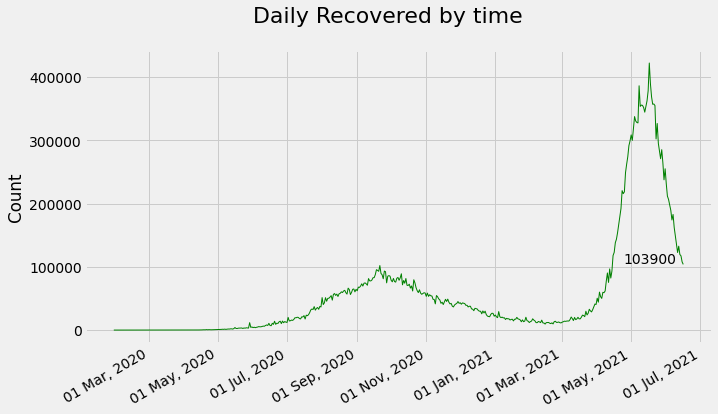

In [23]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_recovered,'-g', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily Recovered by time',fontsize=22)

plt.annotate(text=str(today_recovered), xy=(curr_date, today_recovered),
             xycoords='data', xytext=(-60,1), textcoords='offset points', fontsize=14)

In [24]:
active_cases = total_cases-total_deaths-total_recovered

In [25]:
curr_active_cases = curr_total_cases - curr_total_deaths - curr_total_recovered

Text(-66, 1, '833671')

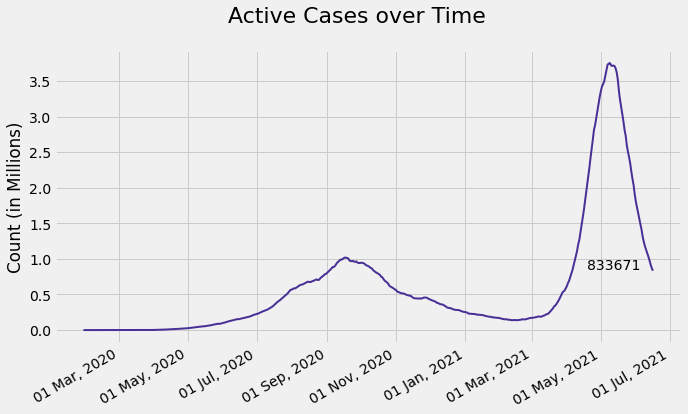

In [26]:
plt.figure(figsize=(10,6))
plt.plot(dates, active_cases/10**6, color='#483096', linewidth=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count (in Millions)')
plt.suptitle('Active Cases over Time',fontsize=22)

plt.annotate(text=str(curr_active_cases), xy=(curr_date, curr_active_cases/10**6),
             xycoords='data', xytext=(-66,1), textcoords='offset points', fontsize=14)

## Summary

### 1. Case Fatality Ratio (CFR)

Case fatality ratio(CFR) is ratio to measure risk of death when person is infected with a disease. The actual probability of death of person diagonsed with a disease is generally less since everybody is not tested to have a disease or not. Hence their would be a scenario where their are people who have the disease but are not diagonsed.
CFR can increase or decrease, or could vary by location and characteristics of the infected person.

CFR gives rough chances of death if person is infected with COVID-19

$$CFR=\frac{Number\ of\ deaths\ from\ disease}{Number\ of\ diagonsed\ case\ of\ disease}X\ 100$$

In [27]:
inf_fatality_ratio = (total_deaths/total_cases)*100

In [28]:
curr_fat_ratio = (curr_total_deaths/curr_total_cases)*100

Text(-48, -10, '1.284')

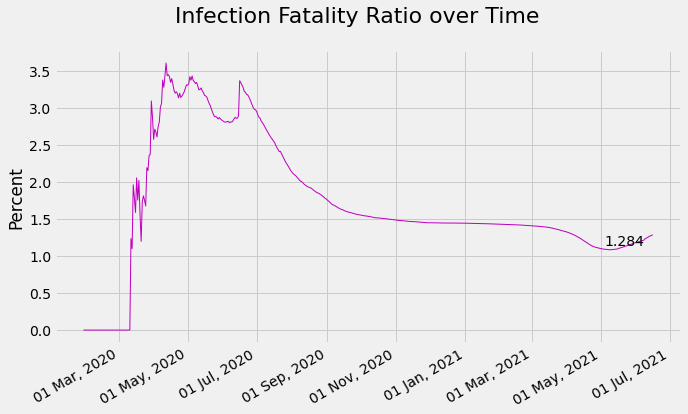

In [29]:
plt.figure(figsize=(10,6))
plt.plot(dates, inf_fatality_ratio,'-m', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Infection Fatality Ratio over Time',fontsize=22)
# plt.title('(Chances of Death)')

plt.annotate(text=str(round(curr_fat_ratio, 3)), xy=(curr_date, curr_fat_ratio),
             xycoords='data', xytext=(-48,-10), textcoords='offset points', fontsize=14)

### 2. Rate of Recovery

$$Recovery\ Rate = \frac{Number\ of\ recovries\ from\ disease}{Number\ of\ diagonsed\ case\ of\ disease}X\ 100$$

During the rise of second wave, recovery rate started falling from March 2021 and settled at 80% after which has started to grow again

In [30]:
recovery_rate = (total_recovered/total_cases)*100

In [31]:
curr_rec_ratio = (curr_total_recovered/curr_total_cases)*100

Text(-50, -5, '95.91')

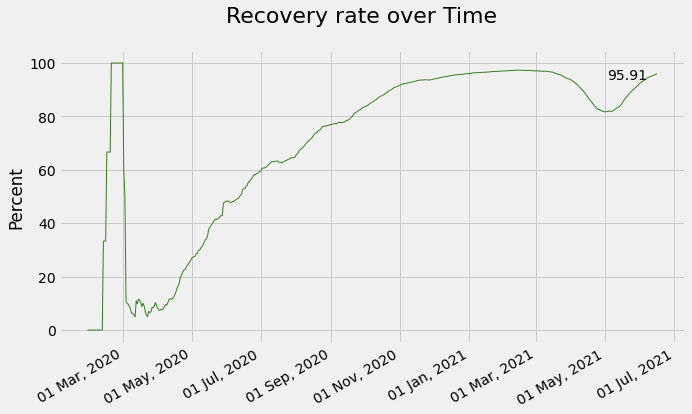

In [32]:
plt.figure(figsize=(10,6))
plt.plot(dates, recovery_rate, color='#3b7d24', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Recovery rate over Time',fontsize=22)

plt.annotate(text=str(round(curr_rec_ratio, 2)), xy=(curr_date, curr_rec_ratio),
             xycoords='data', xytext=(-50,-5), textcoords='offset points', fontsize=14)

In [33]:
per_act_cases = (active_cases/total_cases)*100

In [34]:
curr_per_act_cases = (curr_active_cases/curr_total_cases)*100

Text(-40, 1, '2.81')

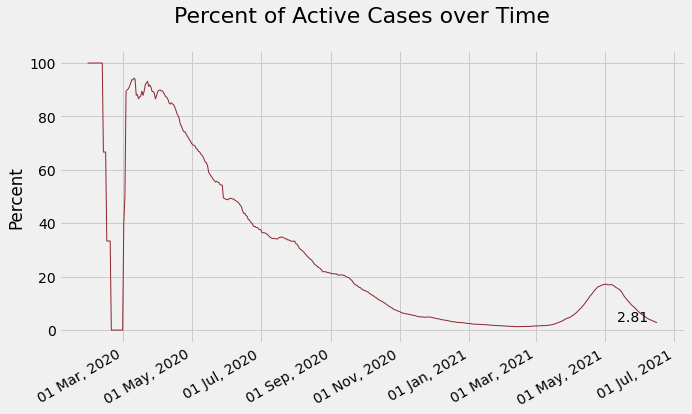

In [35]:
plt.figure(figsize=(10,6))
plt.plot(dates, per_act_cases, color='#8c2730', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Percent of Active Cases over Time',fontsize=22)

plt.annotate(text=str(round(curr_per_act_cases, 2)), xy=(curr_date, curr_per_act_cases),
             xycoords='data', xytext=(-40,1), textcoords='offset points', fontsize=14)

Text(-60, -10, '833671')

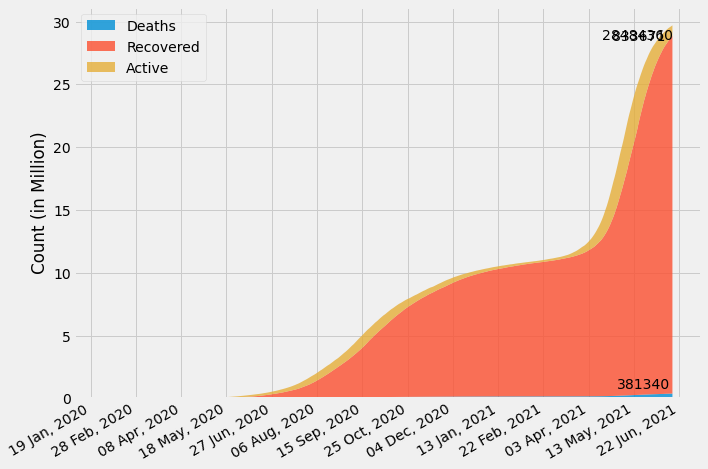

In [36]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

labels = ['Deaths','Recovered','Active']
ax.stackplot(dates, total_deaths/10**6,total_recovered/10**6,active_cases/10**6, alpha=.8, labels=labels)
ax.set_ylabel('Count (in Million)')
ax.legend(loc='upper left')

fig.autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')

ax.xaxis.set_major_locator(plt.MaxNLocator(18))
ax.xaxis.set_major_formatter(date_format)

plt.annotate(text=str(curr_total_deaths), xy=(curr_date, curr_total_deaths/10**6),
             xycoords='data', xytext=(-55,5), textcoords='offset points', fontsize=14)

plt.annotate(text=str(curr_total_recovered), xy=(curr_date, curr_total_recovered/10**6),
             xycoords='data', xytext=(-70,1), textcoords='offset points', fontsize=14)

plt.annotate(text=str(curr_active_cases), xy=(curr_date, curr_active_cases/10**6 + curr_total_recovered/10**6),
             xycoords='data', xytext=(-60,-10), textcoords='offset points', fontsize=14)

In [37]:
total_deaths.max()

381340

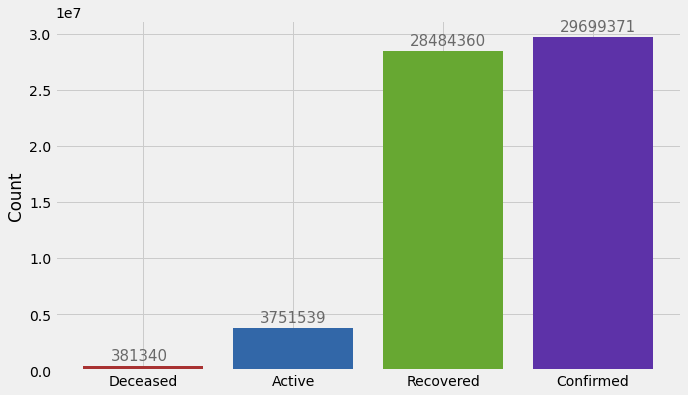

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Deceased', 'Active', 'Recovered', 'Confirmed']
values = [total_deaths.max(), active_cases.max(), total_recovered.max(), total_cases.max()]

ax.bar(labels, values, color=['#a83232','#3267a8','#67a832','#5d32a8'])
ax.set_ylabel('Count')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.18, i.get_height()+500000, \
            str(round(i.get_height())), fontsize=15,
                color='dimgrey')

plt.savefig('Images/cases_summary.png')


## **2. Vaccination**

India began its **vaccination program** on **16 January 2021**. India has approved two vaccines for emergency use, including Oxford-AstraZeneca vaccine also known as **Covisheld** manufactured by the Serum Institue of India, and **Covaxin** developed by Biotech. In April 2021 ,Sputnik V was approved as a third vaccine.

India first started with vaccinating Health care workers being first to receive the vaccine. On **April 1 2021** vaccination of people above **age 45** was started. Followed by vaccination of age **group 18-44** from **1 May** onwards.

In [39]:
vac_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
pd.set_option('display.max_rows', 10)

In [40]:
filt = vac_df.State=='India'
ind_vac_df = vac_df.loc[filt].copy()

In [41]:
ind_vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,14/06/2021,India,207274441.0,14048206.0,46924.0,207274441.0,47378599.0,111868784.0,95369557.0,36100.0,30779165.0,223847280.0,26595.0,22118.0,60913444.0,82600503.0,63665384.0,254653040.0
150,15/06/2021,India,209816439.0,11834657.0,41484.0,209816439.0,47789089.0,113266182.0,96513504.0,36753.0,31248316.0,226329536.0,27676.0,22127.0,62448482.0,83290805.0,63979181.0,257605528.0
151,16/06/2021,India,212945352.0,14252163.0,44447.0,212945352.0,48173116.0,114978703.0,97929255.0,37394.0,31695663.0,229393676.0,29129.0,22155.0,64643068.0,83939373.0,64262201.0,261118468.0
152,17/06/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
total_population = 1380004385

In [43]:
ind_vac_df.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

In [44]:
ind_vac_df.drop(['State','Total Sessions Conducted','Total Sites ','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','AEFI'], axis=1, inplace=True)

In [45]:
ind_vac_df

,Updated On,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,48276.0,48276.0,0.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,58604.0,58604.0,0.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,99449.0,99449.0,0.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,195525.0,195525.0,0.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,251280.0,251280.0,0.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...
149,14/06/2021,207274441.0,207274441.0,47378599.0,30779165.0,223847280.0,26595.0,60913444.0,82600503.0,63665384.0,254653040.0
150,15/06/2021,209816439.0,209816439.0,47789089.0,31248316.0,226329536.0,27676.0,62448482.0,83290805.0,63979181.0,257605528.0
151,16/06/2021,212945352.0,212945352.0,48173116.0,31695663.0,229393676.0,29129.0,64643068.0,83939373.0,64262201.0,261118468.0
152,17/06/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ind_vac_df['Total Doses Administered']=ind_vac_df['First Dose Administered']+ind_vac_df['Second Dose Administered']

In [47]:
ind_vac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Updated On                     154 non-null    object 
 1   Total Individuals Vaccinated   152 non-null    float64
 2   First Dose Administered        152 non-null    float64
 3   Second Dose Administered       152 non-null    float64
 4   Total Covaxin Administered     152 non-null    float64
 5   Total CoviShield Administered  152 non-null    float64
 6   Total Sputnik V Administered   27 non-null     float64
 7   18-45 years (Age)              93 non-null     float64
 8   45-60 years (Age)              93 non-null     float64
 9   60+ years (Age)                93 non-null     float64
 10  Total Doses Administered       152 non-null    float64
dtypes: float64(10), object(1)
memory usage: 14.4+ KB


In [48]:
ind_vac_df.rename(columns={'Updated On':'Date'}, inplace=True)

In [49]:
ind_vac_df.dropna(thresh=5,inplace=True)

In [50]:
ind_vac_df.loc[:,['First Dose Administered','Second Dose Administered',
                  'Total Covaxin Administered','Total CoviShield Administered',
                  'Total Individuals Vaccinated',
                  'Total Doses Administered']]=ind_vac_df.loc[:,['First Dose Administered',
                                                                 'Second Dose Administered',
                                                                 'Total Covaxin Administered','Total CoviShield Administered','Total Individuals Vaccinated','Total Doses Administered']].astype('int64')

In [51]:
ind_vac_df['Date'] = pd.to_datetime(ind_vac_df['Date'],format='%d/%m/%Y')

In [52]:
ind_vac_df

,Date,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276
1,2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604
2,2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449
3,2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525
4,2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280
...,...,...,...,...,...,...,...,...,...,...,...
147,2021-06-12,202207183,202207183,46825911,29975845,219032482,24767.0,57472406.0,81467278.0,63177391.0,249033094
148,2021-06-13,203705131,203705131,46951231,30185294,220445754,25314.0,58561036.0,81756122.0,63296269.0,250656362
149,2021-06-14,207274441,207274441,47378599,30779165,223847280,26595.0,60913444.0,82600503.0,63665384.0,254653040
150,2021-06-15,209816439,209816439,47789089,31248316,226329536,27676.0,62448482.0,83290805.0,63979181.0,257605528


###  Percentage share of population vaccinated

After the first quarter of the vaccination drive, India has vaccinated **10.13%** of its total population which is about **139 Million** Individuals vaccinated out of which **2.9%** are fully vaccinated. At the end of the quarter one, average Individuals immunized are **0.93 Million**.

In [53]:
ind_vac_df.set_index('Date',inplace=True)

In [54]:
ind_vac_df['Percentage Population Vaccinated'] = (ind_vac_df['Total Individuals Vaccinated']/total_population)*100

In [55]:
ind_vac_df['Percentage Population Completely Vaccinated'] = (ind_vac_df['Second Dose Administered']/total_population)*100

In [56]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated
Date,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-12,202207183,202207183,46825911,29975845,219032482,24767.0,57472406.0,81467278.0,63177391.0,249033094,14.652648,3.393171
2021-06-13,203705131,203705131,46951231,30185294,220445754,25314.0,58561036.0,81756122.0,63296269.0,250656362,14.761194,3.402252
2021-06-14,207274441,207274441,47378599,30779165,223847280,26595.0,60913444.0,82600503.0,63665384.0,254653040,15.019839,3.433221


In [57]:
curr_date = ind_vac_df.index.max()
curr_fst_dose = ind_vac_df.loc[curr_date, 'First Dose Administered']
curr_snd_dose = ind_vac_df.loc[curr_date, 'Second Dose Administered']

In [58]:
per_pop_vac = ind_vac_df['Percentage Population Vaccinated'].max()
per_pop_com_vac = ind_vac_df['Percentage Population Completely Vaccinated'].max()

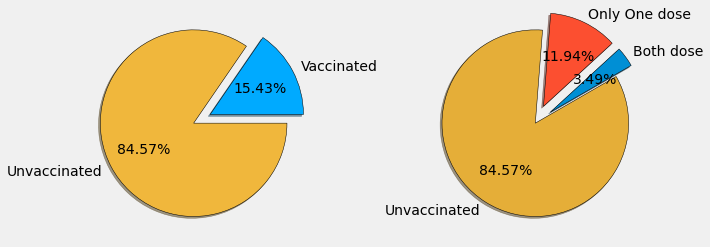

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)

slices = [per_pop_vac, 100-per_pop_vac]
colors = ['#00aaff', '#f0b73c']
labels = ['Vaccinated','Unvaccinated']
ax1.pie(slices, labels=labels,colors=colors, wedgeprops={'edgecolor':'black'}, shadow=True, explode=(0.2,0),  autopct='%.2f%%')

slices = [per_pop_com_vac, per_pop_vac-per_pop_com_vac, 100-per_pop_vac]
labels = ['Both dose','Only One dose','Unvaccinated']
ax2.pie(slices, labels=labels,startangle=30,
        wedgeprops={'edgecolor':'black'}, shadow=True, explode=(0.2,0.2,0),  autopct='%.2f%%')

plt.savefig('Images/vac_percent.png')
plt.show()

### Cumulative doses administered across the country

Text(-35, 0, '15.43')

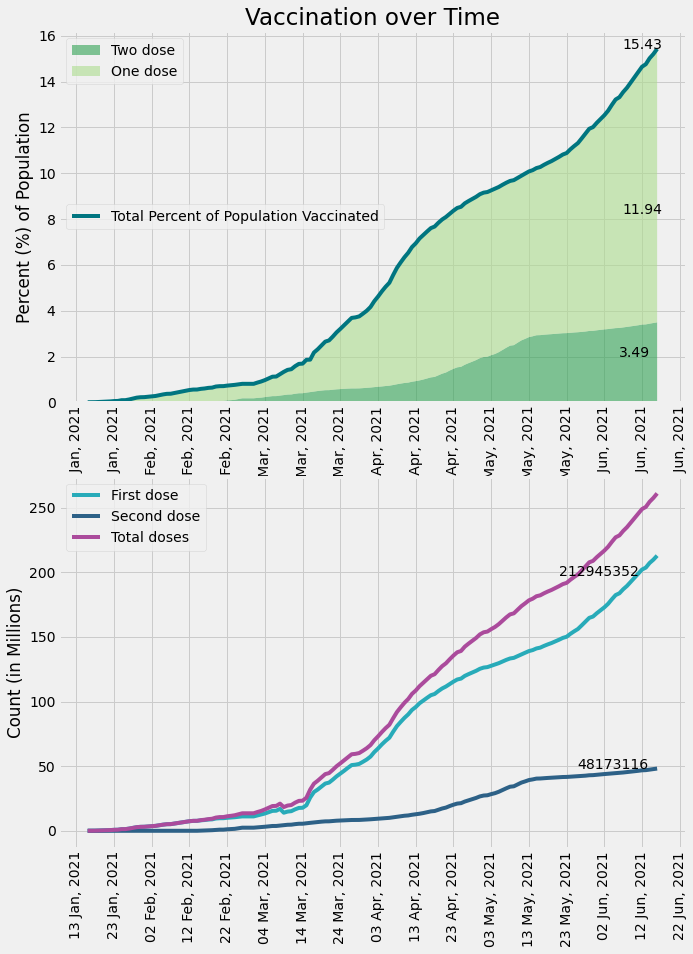

In [60]:
fig, (ax,ax2) = plt.subplots(2,1)
fig.set_figheight(14)
fig.set_figwidth(10)

ax1 = ax.twiny()
ax.stackplot(ind_vac_df.index, ind_vac_df['Percentage Population Completely Vaccinated'],
             ind_vac_df['Percentage Population Vaccinated']-ind_vac_df['Percentage Population Completely Vaccinated'],
             labels=['Two dose','One dose'],colors=['#31a354','#addd8e'], alpha=.6)
ax.set_ylabel('Percent (%) of Population')
ax.legend(loc='upper left')

ax.set_xticks(ind_vac_df.index)
ax.xaxis.set_major_locator(plt.MaxNLocator(18))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    

date_format = mpl_dates.DateFormatter('%d %b, %Y')
ax.xaxis.set_major_formatter(date_format)

ax1.plot(ind_vac_df.index, ind_vac_df['Percentage Population Vaccinated'],
         label='Total Percent of Population Vaccinated', color='#007580')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.legend(loc='center left')

ax1.set_title('Vaccination over Time', fontsize=23)


ax2.plot(ind_vac_df.index, ind_vac_df['First Dose Administered']/10**6, color='#28abb9', label='First dose')
ax2.plot(ind_vac_df.index, ind_vac_df['Second Dose Administered']/10**6, color='#2d6187', label='Second dose')
ax2.plot(ind_vac_df.index, ind_vac_df['First Dose Administered']/10**6+ind_vac_df['Second Dose Administered']/10**6, color='#ab4b9c', label='Total doses')
ax2.legend()
ax2.set_ylabel('Count (in Millions)')
ax2.set_xticks(ind_vac_df.index)
ax2.xaxis.set_major_locator(plt.MaxNLocator(18))
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.xaxis.set_major_formatter(date_format)
ax2.annotate(text=str(curr_fst_dose), xy=(curr_date,curr_fst_dose/10**6), xycoords='data',
            xytext=(-98, -20),
            textcoords='offset points')
ax2.annotate(text=str(curr_snd_dose), xy=(curr_date,curr_snd_dose/10**6), xycoords='data',
            xytext=(-80, 0),
            textcoords='offset points')

plt.annotate(text=str(round(per_pop_com_vac,2)), xy=(curr_date, per_pop_com_vac),
             xycoords='data', xytext=(-38,-35), textcoords='offset points', fontsize=14)

plt.annotate(text=str(round(per_pop_vac-per_pop_com_vac, 2)), xy=(curr_date, per_pop_vac-per_pop_com_vac),
             xycoords='data', xytext=(-35,-85), textcoords='offset points', fontsize=14)

plt.annotate(text=str(round(per_pop_vac, 2)), xy=(curr_date, per_pop_vac),
             xycoords='data', xytext=(-35,0), textcoords='offset points', fontsize=14)

### Individuals immunized on daily basis

In [61]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(text, xy, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinate system that *xy* is given in. The following types
  

In [62]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated
Date,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-12,202207183,202207183,46825911,29975845,219032482,24767.0,57472406.0,81467278.0,63177391.0,249033094,14.652648,3.393171
2021-06-13,203705131,203705131,46951231,30185294,220445754,25314.0,58561036.0,81756122.0,63296269.0,250656362,14.761194,3.402252
2021-06-14,207274441,207274441,47378599,30779165,223847280,26595.0,60913444.0,82600503.0,63665384.0,254653040,15.019839,3.433221


In [63]:
daily_vac = []

prev_vac=0;
curr_vac=0;

for i in range(ind_vac_df.shape[0]):
    curr_vac=ind_vac_df['Total Individuals Vaccinated'][i]
    daily_vac.append(curr_vac - prev_vac)
    prev_vac=curr_vac
    
ind_vac_df['Daily Individuals Vaccinated'] = daily_vac

In [64]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated,Daily Individuals Vaccinated
Date,,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000,48276
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000,10328
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000,40845
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000,96076
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000,55755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-12,202207183,202207183,46825911,29975845,219032482,24767.0,57472406.0,81467278.0,63177391.0,249033094,14.652648,3.393171,3229589
2021-06-13,203705131,203705131,46951231,30185294,220445754,25314.0,58561036.0,81756122.0,63296269.0,250656362,14.761194,3.402252,1497948
2021-06-14,207274441,207274441,47378599,30779165,223847280,26595.0,60913444.0,82600503.0,63665384.0,254653040,15.019839,3.433221,3569310


In [65]:
daily_vac = ind_vac_df['Daily Individuals Vaccinated']

In [66]:
daily_vac

Date
2021-01-16      48276
2021-01-17      10328
2021-01-18      40845
2021-01-19      96076
2021-01-20      55755
               ...   
2021-06-12    3229589
2021-06-13    1497948
2021-06-14    3569310
2021-06-15    2541998
2021-06-16    3128913
Name: Daily Individuals Vaccinated, Length: 152, dtype: int64

In [67]:
todays_vac = daily_vac.get(curr_date)

In [68]:
avg_daily_vac = daily_vac.median()

In [69]:
avg_daily_vac

1269987.0

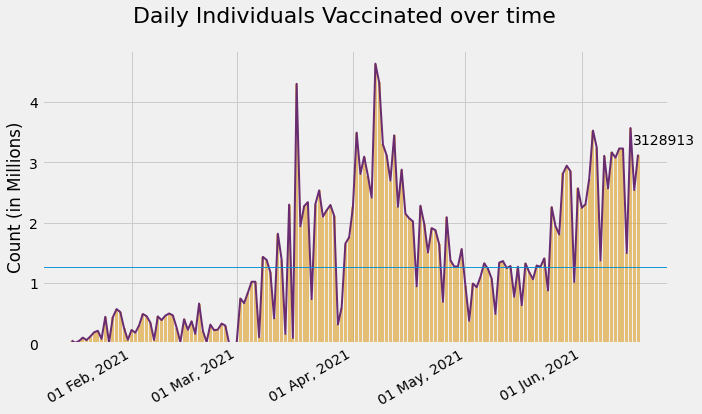

In [70]:
plt.figure(figsize=(10,6))
plt.bar(daily_vac.index, daily_vac.values/10**6,color='#de9d23', alpha=.6)
plt.plot(daily_vac/10**6, color='#6a2c70', linewidth=2)
plt.axhline(y=avg_daily_vac/10**6, linewidth=1, alpha=.9)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(daily_vac)/15))

plt.ylabel('Count (in Millions)')
plt.suptitle('Daily Individuals Vaccinated over time', fontsize=22)

plt.annotate(text=str(todays_vac), xy=(curr_date, todays_vac/10**6),
             xycoords='data', xytext=(-5,10), textcoords='offset points', fontsize=14)

plt.savefig('Images/daily_vac.png')